### Data Quality Assessment.

#### Assessment of data quality and completeness in preparation for analysis



**Objectives:**
* Assess data quality issues.


In [6]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
# Set pandas output display to print 15 rows.
pd.options.display.max_rows = 15

In [3]:
# Import the Sprocket Central Pty Ltd data into pandas dataframe.

data_file = 'input/KPMG_VI_New_raw_data_update_final.xlsx'

# title_sheet = pd.read_excel(data_file, sheet_name=0, index_col=0, skiprows=1, parse_dates=True)
transactions = pd.read_excel(data_file, sheet_name=1, index_col="transaction_date", skiprows=1, parse_dates=True)
new_customer_list = pd.read_excel(data_file, sheet_name=2, index_col=0, skiprows=1, parse_dates=True)
customer_demographic = pd.read_excel(data_file, sheet_name=3, index_col=0, skiprows=1, parse_dates=True)
customer_address = pd.read_excel(data_file, sheet_name=4, index_col=0, skiprows=1, parse_dates=True)


In [4]:
transactions.head()

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_date,,,,,,,,,,,,
2017-02-25,1,2,2950,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2017-05-21,2,3,3120,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2017-10-16,3,37,402,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
2017-08-31,4,88,3135,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
2017-10-01,5,78,787,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
new_customer_list.head()

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [10]:
customer_demographic.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [11]:
customer_address.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


#### Check for Accuracy of Values

**Correctness**

Text(0.5, 0, 'Transaction Date')

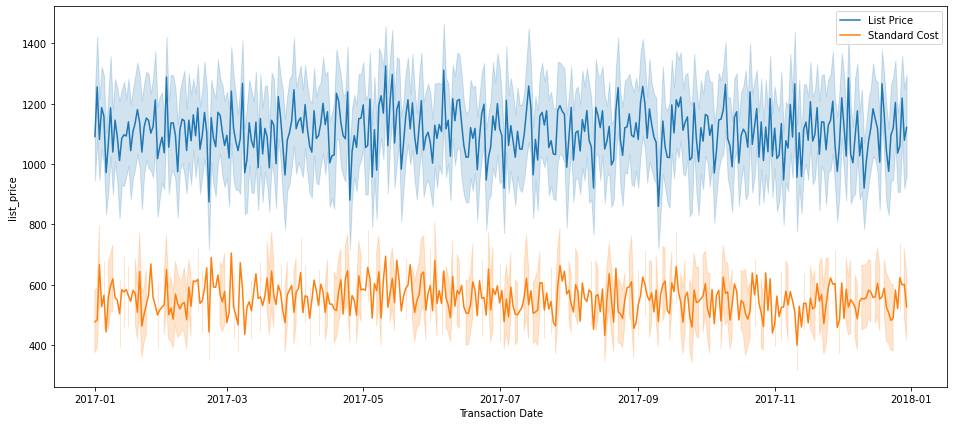

In [7]:
# ## Transaction Dataframe

# # Set the width and height of the figure
plt.figure(figsize=(16,7))

# # Line chart over time 
sns.lineplot(data=transactions['list_price'], label="List Price")

sns.lineplot(data=transactions['standard_cost'], label="Standard Cost")

# # Add label for horizontal axis
plt.xlabel("Transaction Date")

In [13]:
## Null values check
transactions.isnull().values.any()


True

In [14]:
print(transactions.dtypes)

transaction_id               int64
product_id                   int64
customer_id                  int64
online_order               float64
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost              float64
product_first_sold_date    float64
dtype: object


In [19]:
print("Transactions: ",transactions.isnull().sum())
print("\n New Customer List: ",new_customer_list.isnull().sum())
print("\n Customer Demographic: ", customer_demographic.isnull().sum())
print("\n Customer Address: ",customer_address.isnull().sum())

Transactions:  transaction_id               0
product_id                   0
customer_id                  0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

 New Customer List:  last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
                                      ... 
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
Length: 22, dtype: int64

 Customer Demographic:  first_name                               0
last_name   

In [16]:
transactions.isnull().sum().sum()

1542

In [17]:
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], format='%Y-%m-%d')

In [18]:
transactions['product_first_sold_date'][0:10]

transaction_date
2017-02-25   1970-01-01 00:00:00.000041245
2017-05-21   1970-01-01 00:00:00.000041701
2017-10-16   1970-01-01 00:00:00.000036361
2017-08-31   1970-01-01 00:00:00.000036145
2017-10-01   1970-01-01 00:00:00.000042226
2017-03-08   1970-01-01 00:00:00.000039031
2017-04-21   1970-01-01 00:00:00.000034165
2017-07-15   1970-01-01 00:00:00.000039915
2017-08-10   1970-01-01 00:00:00.000033455
2017-08-30   1970-01-01 00:00:00.000038216
Name: product_first_sold_date, dtype: datetime64[ns]

In [19]:
list(set(transactions.brand))

['Solex',
 nan,
 'Trek Bicycles',
 'Norco Bicycles',
 'WeareA2B',
 'OHM Cycles',
 'Giant Bicycles']

In [20]:
list(set(transactions.product_line))

[nan, 'Standard', 'Road', 'Mountain', 'Touring']